In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df['Age'].isnull().sum()

177

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age']= df['Age'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


In [10]:
new_df = pd.DataFrame()

In [11]:
new_df['age'] = df['Age']
new_df['fare'] = df['Fare']

In [12]:
new_df.head()

,age,fare
0,22,7.2500
1,38,71.2833
2,26,7.9250
3,35,53.1000
4,35,8.0500


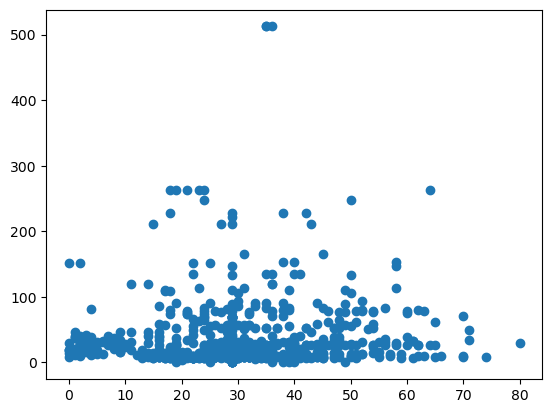

In [13]:
plt.scatter(x='age',y = 'fare',data = new_df)

In [15]:
x = new_df.iloc[:,0:1]
y  = new_df.iloc[:,1]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [19]:
print(x_train.shape)
print(x_test.shape)

(712, 1)
(179, 1)


In [20]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [21]:
linear.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = linear.predict(x_test)

In [24]:
# Finding the Coefs and intercept

# Equation of line is given by y=mx+b
# y=0.81*x + 5.50
# m ---> slope
# b ---> intercept

# X coefficient
print(linear.coef_[0])

# Y intercept
print(linear.intercept_)

0.3613386148055052
21.14144241705599


In [25]:
df1 = pd.DataFrame()
df1['y_test'] = y_test
df1['y_pred'] = y_pred

In [26]:
df1.head()

,y_test,y_pred
619,10.5000,30.536246
461,8.0500,33.426955
421,7.7333,28.729553
404,8.6625,28.368215
880,26.0000,30.174908


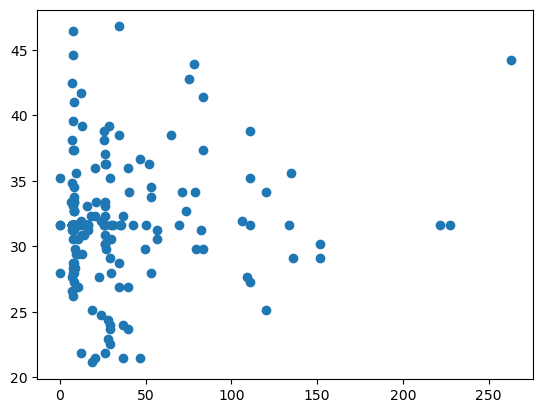

In [28]:
plt.scatter(x='y_test',y='y_pred',data=df1)

In [29]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

27.518696923151474

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1763.3976245754739

In [32]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test,y_pred)

1.2467897219430288

In [33]:
# Root Mean Squared Error
mse=mean_squared_error(y_test,y_pred)

np.sqrt(mse)

41.99282825168452

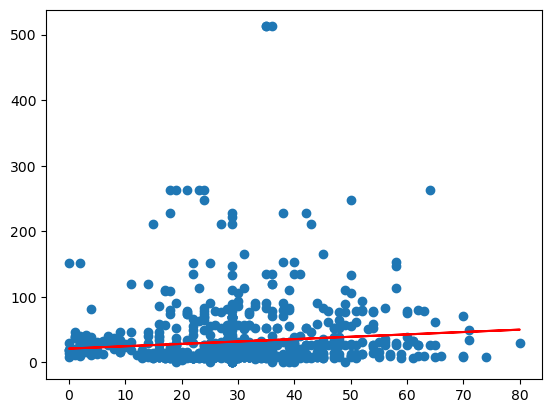

In [36]:
# Visualising the regression line
plt.plot(x_train,linear.predict(x_train), color='red')
plt.scatter(df['Age'],df['Fare'])

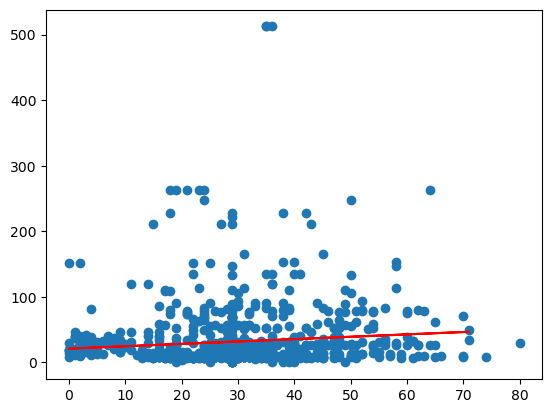

In [37]:
# Visualising the regression line
plt.plot(x_test,linear.predict(x_test), color='red')
plt.scatter(df['Age'],df['Fare'])